In [1]:
!pip install pandas numpy nltk scikit-learn
!pip install transformers torch numpy pandas scikit-learn
!pip install transformers torch numpy pandas scikit-learn datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from collections import Counter
import string


# Load dataset
file_path = "/content/drive/MyDrive/archive (3)/data.csv"
df = pd.read_csv(file_path)

# Check for missing values
print(df.isnull().sum())

# Display first few rows
print(df.head())


Sentence     0
Sentiment    0
dtype: int64
                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line is added to download the required resource.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
# Drop rows with missing values
df = df.dropna()

In [7]:
# Ensure the dataset has necessary columns
if "Sentence" not in df.columns or "Sentiment" not in df.columns:
    raise ValueError("Dataset must contain 'Sentence' and 'Sentiment' columns.")

<ipython-input-9-1b3710c9acd5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="coolwarm") # Changed 'sentiment' to 'Sentiment'


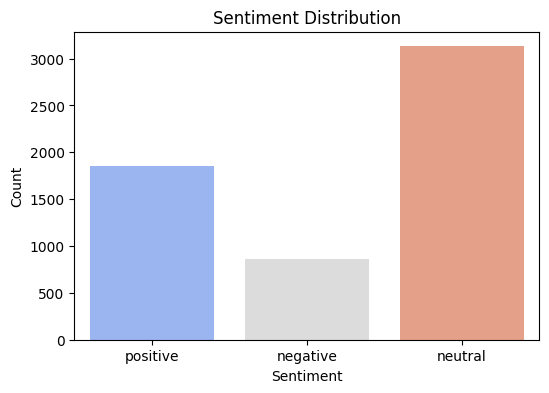

In [9]:
# Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Sentiment"], palette="coolwarm") # Changed 'sentiment' to 'Sentiment'
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

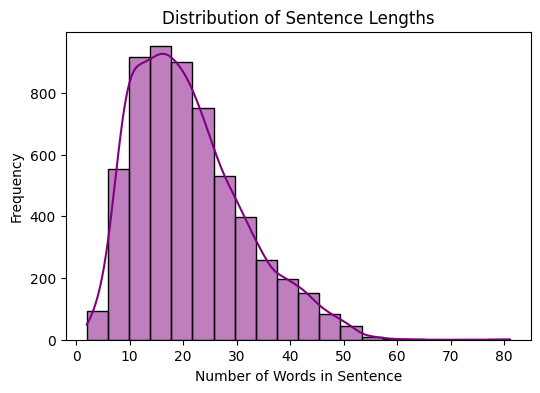

In [11]:
# Text Length Distribution
df["text_length"] = df["Sentence"].apply(lambda x: len(x.split())) # Changed 'headline' to 'Sentence'

plt.figure(figsize=(6, 4))
sns.histplot(df["text_length"], bins=20, kde=True, color="purple")
plt.xlabel("Number of Words in Sentence") # Changed 'Headline' to 'Sentence'
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths") # Changed 'Headline' to 'Sentence'
plt.show()

In [13]:
# Word Frequency Analysis
stop_words = set(stopwords.words("english"))
# Changed 'headline' to 'Sentence' to match the existing column name
all_words = " ".join(df["Sentence"]).lower().translate(str.maketrans("", "", string.punctuation)).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)

In [14]:
# Display most common words
common_words = pd.DataFrame(word_counts.most_common(20), columns=["Word", "Count"])
print("\nMost Common Words:")
print(common_words)



Most Common Words:
         Word  Count
0         eur   1284
1     company    809
2          mn    729
3      profit    568
4       sales    560
5     finnish    527
6        said    516
7         net    499
8     million    493
9   operating    371
10       2009    352
11        mln    348
12       2008    336
13     period    331
14       year    330
15      group    325
16    finland    319
17    quarter    311
18       2007    290
19      share    285


<ipython-input-16-b514b6f515ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_words["Word"], y=common_words["Count"], palette="magma")


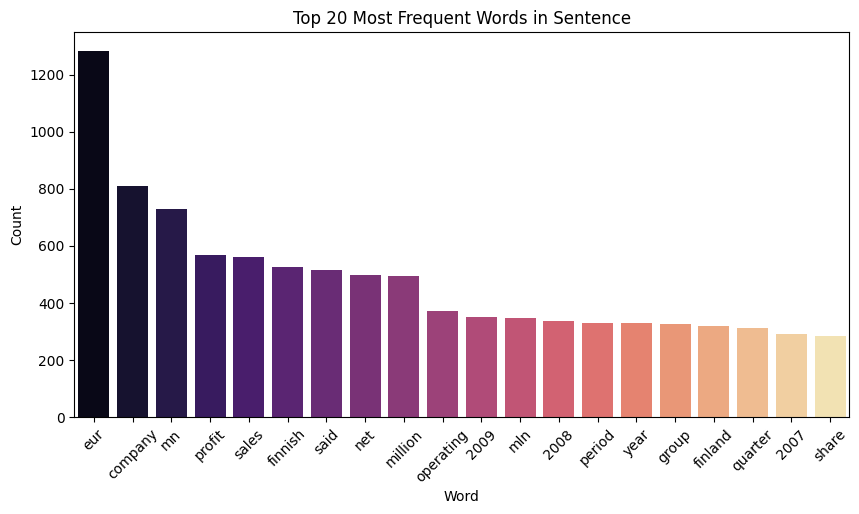

In [16]:
# Plot Word Frequency
plt.figure(figsize=(10, 5))
sns.barplot(x=common_words["Word"], y=common_words["Count"], palette="magma")
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Top 20 Most Frequent Words in Sentence")
plt.show()

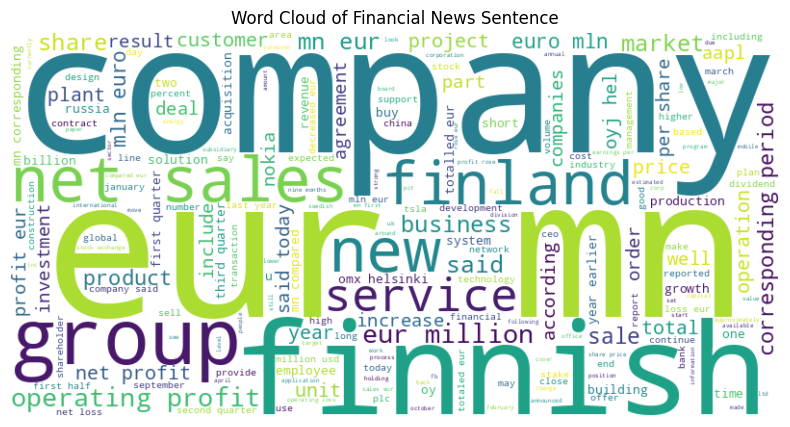

In [18]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Financial News Sentence")
plt.show()

In [5]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove stock tickers like $AAPL
    text = re.sub(r'\$\w+', '', text)

    # Remove numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a single string
    return " ".join(words)

# Apply preprocessing to the "Sentence" column
df["clean_text"] = df["Sentence"].apply(preprocess_text)

# Display preprocessed text
print(df[["Sentence", "clean_text"]].head())


                                            Sentence  \
0  The GeoSolutions technology will leverage Bene...   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...   
2  For the last quarter of 2010 , Componenta 's n...   
3  According to the Finnish-Russian Chamber of Co...   
4  The Swedish buyout firm has sold its remaining...   

                                          clean_text  
0  geosolutions technology leverage benefon gps s...  
1                            low bk real possibility  
2  last quarter componenta net sale doubled eurm ...  
3  according finnishrussian chamber commerce majo...  
4  swedish buyout firm sold remaining percent sta...  


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size
X = vectorizer.fit_transform(df["clean_text"])

# Convert to array
X = X.toarray()


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Sentiment"])

# Show mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'negative': 0, 'neutral': 1, 'positive': 2}


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7023096663815227
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.13      0.20       175
           1       0.69      0.90      0.78       622
           2       0.77      0.65      0.70       372

    accuracy                           0.70      1169
   macro avg       0.63      0.56      0.56      1169
weighted avg       0.68      0.70      0.67      1169



In [11]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load FinBERT tokenizer and model
model_name = "ProsusAI/finbert"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 Sentiments (Positive, Neutral, Negative)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [12]:
def encode_texts(texts, tokenizer, max_length=128):
    return tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors="pt")

# Apply tokenization to dataset
df["encoded"] = df["Sentence"].apply(lambda x: encode_texts(x, tokenizer))


In [13]:
import torch.nn.functional as F

# Define sentiment labels
sentiment_labels = ["negative", "neutral", "positive"]

def predict_sentiment(text):
    # Tokenize text
    encoded_input = encode_texts(text, tokenizer)

    # Perform inference
    with torch.no_grad():
        output = model(**encoded_input)

    # Get prediction
    scores = F.softmax(output.logits, dim=1)
    predicted_class = torch.argmax(scores).item()

    return sentiment_labels[predicted_class]

# Apply prediction to dataset
df["Predicted_Sentiment"] = df["Sentence"].apply(predict_sentiment)

# Display results
print(df[["Sentence", "Predicted_Sentiment"]].head())


                                            Sentence Predicted_Sentiment
0  The GeoSolutions technology will leverage Bene...            negative
1  $ESI on lows, down $1.50 to $2.50 BK a real po...             neutral
2  For the last quarter of 2010 , Componenta 's n...            negative
3  According to the Finnish-Russian Chamber of Co...            positive
4  The Swedish buyout firm has sold its remaining...            positive


In [14]:
from sklearn.metrics import classification_report

print(classification_report(df["Sentiment"], df["Predicted_Sentiment"]))


              precision    recall  f1-score   support

    negative       0.02      0.03      0.02       860
     neutral       0.44      0.19      0.27      3130
    positive       0.14      0.21      0.17      1852

    accuracy                           0.18      5842
   macro avg       0.20      0.15      0.15      5842
weighted avg       0.28      0.18      0.20      5842



In [19]:
import torch
from torch.utils.data import Dataset

# Define sentiment labels mapping
label_map = {"negative": 0, "neutral": 1, "positive": 2}

# ... other code ...
class FinancialNewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        # The labels are already numeric, so no need to map again.
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")

        # Convert label to numerical value
        #label = label_map.get(label, -1)  # Use get to avoid KeyError if label not found

        label = label_map[label]  # Now the label is an integer.
        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": torch.tensor(label, dtype=torch.long),
        }

# Prepare dataset
# df["Sentiment"] = df["Sentiment"].map(label_map)  # This line is no longer needed
dataset = FinancialNewsDataset(df["Sentence"].tolist(), df["Sentiment"].tolist(), tokenizer)
# ... rest of the code ...


In [20]:
from torch.utils.data import DataLoader, random_split

# Split dataset
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


In [17]:
from transformers import AdamW
from torch.nn import CrossEntropyLoss
from torch.optim import lr_scheduler

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define optimizer, loss function, and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
loss_fn = CrossEntropyLoss()

# Learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.1)


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [21]:
from tqdm import tqdm

# Training function
def train(model, train_loader, optimizer, loss_fn):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["labels"].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

# Validation function
def evaluate(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch["input_ids"].to(device), batch["attention_mask"].to(device), batch["labels"].to(device)
            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    return correct / total

# Train for 3 epochs
epochs = 3
for epoch in range(epochs):
    train_loss = train(model, train_loader, optimizer, loss_fn)
    val_accuracy = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Validation Accuracy = {val_accuracy:.4f}")

# Save fine-tuned model
model.save_pretrained("finbert_model")
tokenizer.save_pretrained("finbert_tokenizer")


100%|██████████| 293/293 [1:40:48<00:00, 20.64s/it]


Epoch 1: Train Loss = 0.7014, Validation Accuracy = 0.8075


100%|██████████| 293/293 [1:38:01<00:00, 20.08s/it]


Epoch 2: Train Loss = 0.3568, Validation Accuracy = 0.8229


100%|██████████| 293/293 [1:38:49<00:00, 20.24s/it]


Epoch 3: Train Loss = 0.2307, Validation Accuracy = 0.8015


('finbert_finetuned/tokenizer_config.json',
 'finbert_finetuned/special_tokens_map.json',
 'finbert_finetuned/vocab.txt',
 'finbert_finetuned/added_tokens.json')

In [23]:
# Save fine-tuned model
model.save_pretrained("finbert_model")

# Save tokenizer
tokenizer.save_pretrained("finbert_tokenizer")


('finbert_tokenizer/tokenizer_config.json',
 'finbert_tokenizer/special_tokens_map.json',
 'finbert_tokenizer/vocab.txt',
 'finbert_tokenizer/added_tokens.json')

In [22]:
# Load fine-tuned model
model = BertForSequenceClassification.from_pretrained("finbert_finetuned").to(device)

def predict_sentiment(text):
    encoded_input = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)
    with torch.no_grad():
        output = model(**encoded_input)

    sentiment_labels = ["negative", "neutral", "positive"]
    predicted_class = torch.argmax(output.logits).item()
    return sentiment_labels[predicted_class]

# Example prediction
print(predict_sentiment("The stock market is performing exceptionally well today!"))


positive
